# Exploratory Data Analysis - EDA

EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it’s distribution, null values and much more.
You can either explore data using graphs or through some python functions.
There will be two type of analysis. Univariate and Bivariate. In the univariate, you will be analyzing a single attribute. But in the bivariate, you will be analyzing an attribute with the target attribute.
In the non-graphical approach, you will be using functions such as shape, summary, describe, isnull, info, datatypes and more.
In the graphical approach, you will be using plots such as scatter, box, bar, density and correlation plots.

This notebook is a modified copy of https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

And from https://www.abs.gov.au/ausstats/abs@.nsf/lookup/1307.6feature+article1mar+2009#Why%20is%20it%20important

# Load the Data

Well, first things first. We will load the titanic dataset into python to perform EDA.


In [49]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import random
import missingno as msno
from matplotlib import pyplot as plt

#Load the data
df = sns.load_dataset('titanic')

In [2]:
#View the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Shape of the dataframe (num of rows, num of columns)
df.shape

(891, 15)

Our data is ready to be explored!

# Basic information about data - EDA

The df.info() function will give us the basic information about the dataset: the number of null values, datatypes, and memory usage. For any data, it is good to start by knowing its information. Let’s see how it works with our data. 

In [4]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


We see that we have 3 different types of data: int64, float64 and object. Before applying any analysis to this data, it is important to make sure we understand the meaning of each variable. 

### View missing data

Finding the null values is the most important step in the EDA. Ensuring the quality of data is paramount. So, let’s see how we can find the null values. If the your dataset is of a reasonable size, the library *missingno* can be used to view the distribution of the missing entries.

<Axes: >

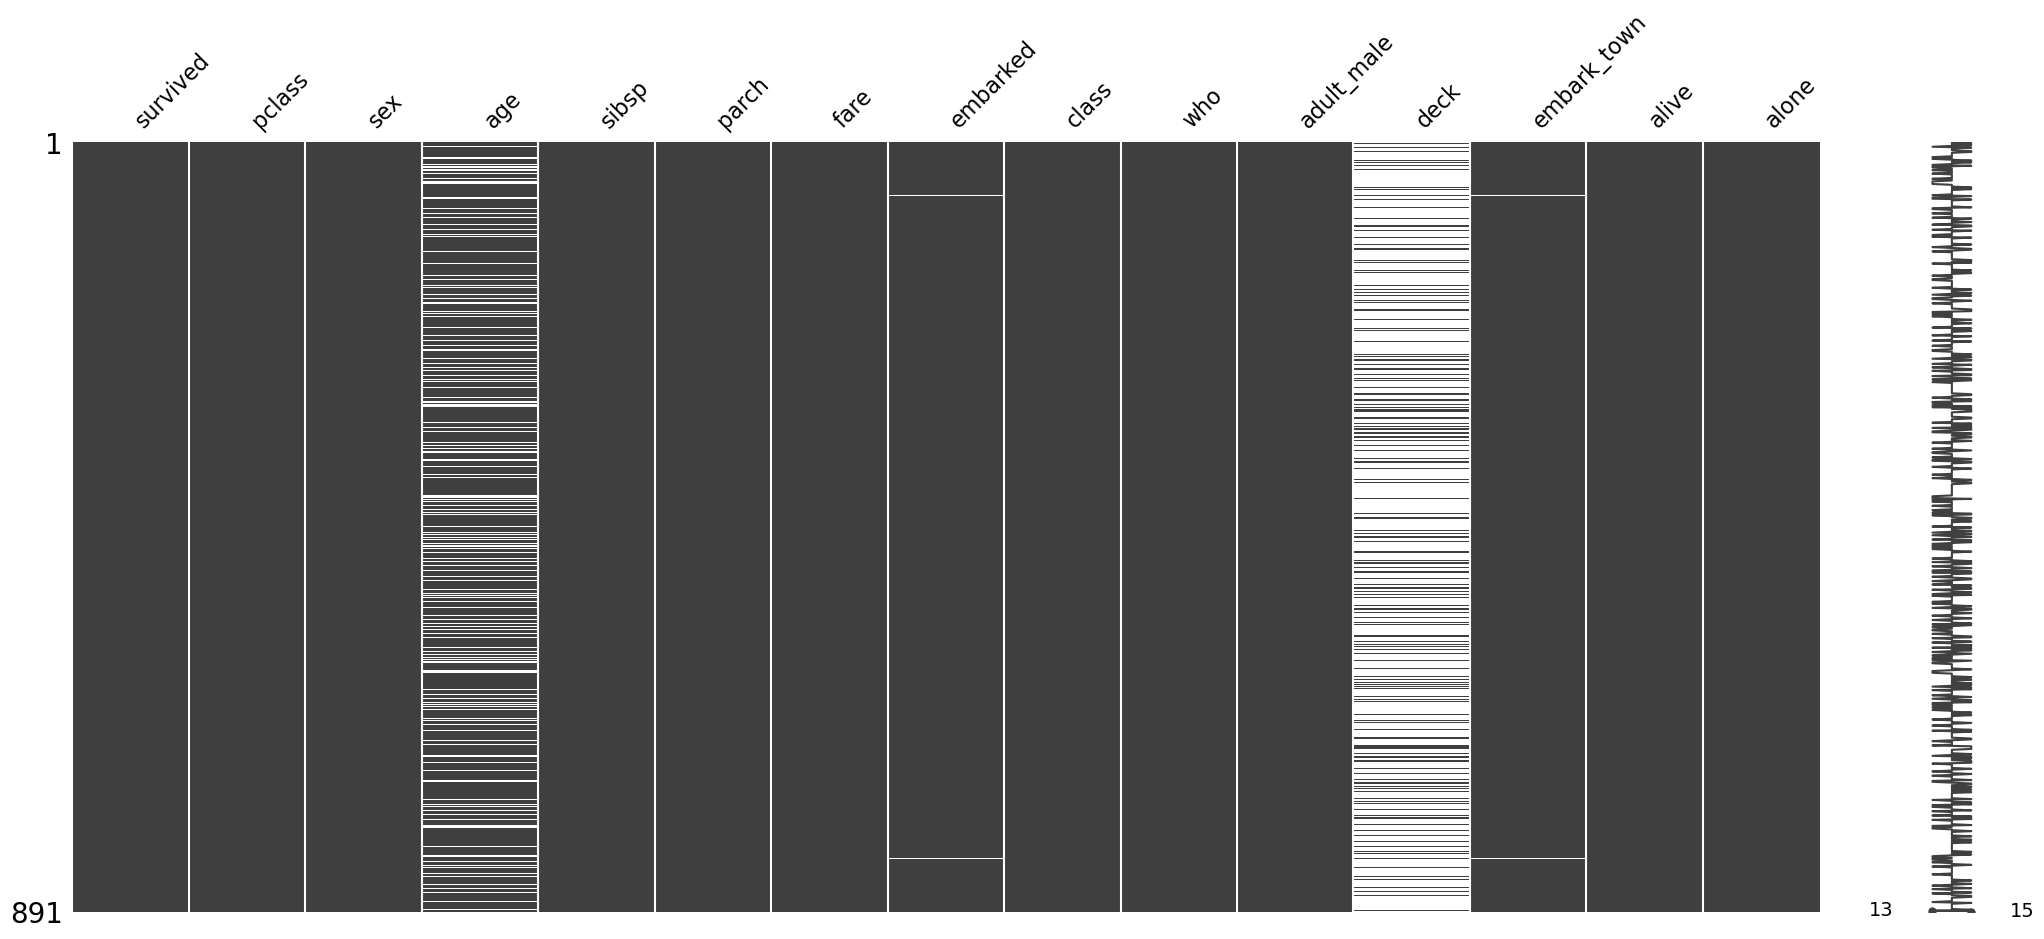

In [5]:
msno.matrix(df)

We see that the column *deck* is very sparse and that the *age* column also has a lot of missing data. Here is another way to view exactly the counts of what is missing.

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Duplicate records?

You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.


In [7]:
#Find the duplicates

df.duplicated().sum()

107

This tells us that 107 rows have twin rows. We can look at these rows here. In this problem, duplicated rows is not an issue as it is not indicative of data entry issues. If the names and/or addresses of the passengers were part of the data, duplicated rows would be indicative of data collection problems. Let's look at the duplicated rows.

In [8]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df_row_counts = df.groupby(df.columns.tolist(), observed = True).size().reset_index(name='RowCount')
df_row_counts[df_row_counts.RowCount>1].sort_values('RowCount', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,RowCount
80,1,1,female,24.0,0,0,69.3,C,First,woman,False,B,Cherbourg,yes,True,2


The problem here is that the groupby function removes all rows with null entries (NaN). We need to specify to keep all rows by setting *dropna=False*. Another parameter we specify here is *observed=True*. This is very useful whenever you have a variable of type *category* (see the df.info() cell above).

In [36]:
df_row_counts = df.groupby(df.columns.tolist(), observed = True, dropna=False).size().reset_index(name='RowCount')
df_row_counts[df_row_counts.RowCount>1].sort_values('RowCount', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,is_child,RowCount
440,0,3,male,NaN,0,0,7.8958,Third,man,True,NaN,Southampton,no,True,False,13
441,0,3,male,NaN,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,12
436,0,3,male,NaN,0,0,7.7500,Third,man,True,NaN,Queenstown,no,True,False,8
730,1,3,female,NaN,0,0,7.7500,Third,woman,False,NaN,Queenstown,yes,True,False,7
158,0,2,male,NaN,0,0,0.0000,Second,man,True,NaN,Southampton,no,True,False,6


So how many unique rows do we have? Which rows a duplication of each other? In order to view this, we can group identical rows together by grouping over all colunms - *list(df.colunms)* - and counting the resulting rows.

In [120]:
df_row_counts.shape

(784, 16)

# Descriptive statistics - univariate

A statistics summary gives information about the data in a sample. It can help understand the values better. It may include the total number of values, minimum value, and maximum value, along with the mean value and the standard deviation corresponding to a data collection. With this, you can understand the trends, outliers, and distribution of values in a data set. This is especially useful when dealing with large amounts of data as it can help in analyzing the data better. This information can be utilized to steer the rest of the analysis and derive more information about a data set. These are values that are calculated based on the sample data and do not go beyond the data on hand.  
 
 Descriptive statistics can show where the mean of a set of values lies. It can also help to understand if the data is skewed. Descriptive or summary statistics include: 

1. Description of the sample size (usually denoted by N)  
2. Description of the center of the data or values (Mean value) 
3. Description of how the values are spread 
4. Plotted graphs and charts that help understand the distribution of values.  

## Categorical variables: counts, distributions and conditional distributions

In [40]:
#Describe the data - Descriptive statistics for categorical variables (object).

df.describe(include=['object', 'bool', 'category'])

,sex,class,who,adult_male,deck,embark_town,alive,alone,is_child
count,891,891,891,891,203,889,891,891,891
unique,2,3,3,2,7,3,2,2,2
top,male,Third,man,True,C,Southampton,no,True,False
freq,577,491,537,537,59,644,549,537,808


This gives an overview of all the non-numerical variables: sex, embarked, class, who, adult_male, deck, embark_town, alive and alone.
* *count* gives the number of non-null entries.
* *unique*, the number of unique values
* *top*, the most frequent value, also called the *mode*
* *freq*, the frequency of the top-value, of the mode

### Unique values

You can find the number of unique values in the particular column using unique() function in python.


The unique() function has returned the unique values which are present in the data and it is pretty much cool!

In [41]:
#unique values

df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [42]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [59]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

### Visualize the Unique counts - categorical

Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the sns.countlot() function and specify the variable to plot the count plot.


<Axes: xlabel='sex', ylabel='count'>

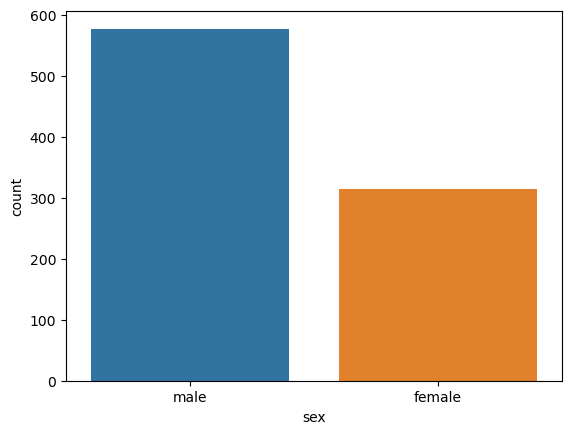

In [43]:
#Plot the unique values

sns.countplot(data=df, x='sex')

<Axes: xlabel='survived', ylabel='count'>

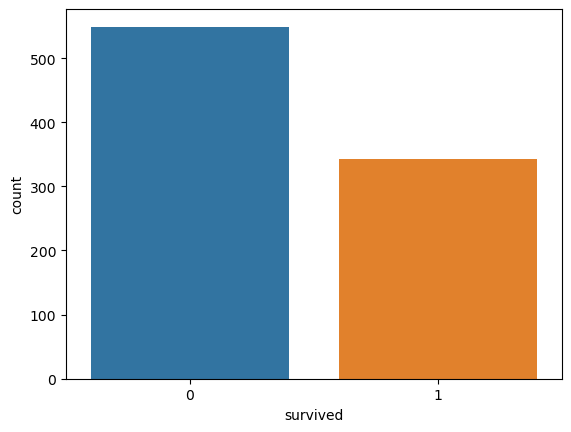

In [44]:
#Plot the unique values

sns.countplot(data=df, x='survived')

### Categorical : Conditional distributions.

We can look at the resulting distributions when breaking down the data by various variables. This is called conditioning on a variable (*who* for instance). As we do this, we see that the survival distributions vary drastically when conditioned on the *who* variable.

<Axes: xlabel='who', ylabel='count'>

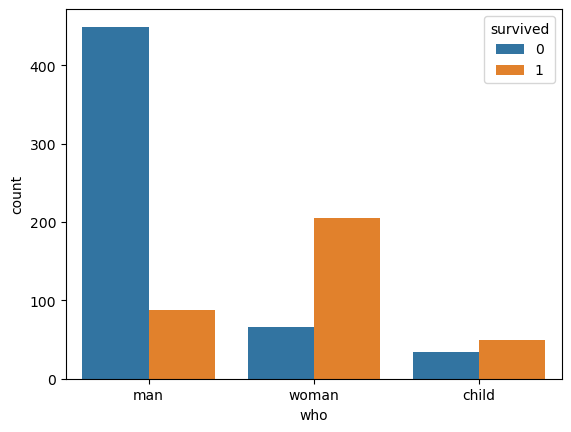

In [39]:
sns.countplot(data=df, x='who', hue='survived')

<Axes: xlabel='class', ylabel='count'>

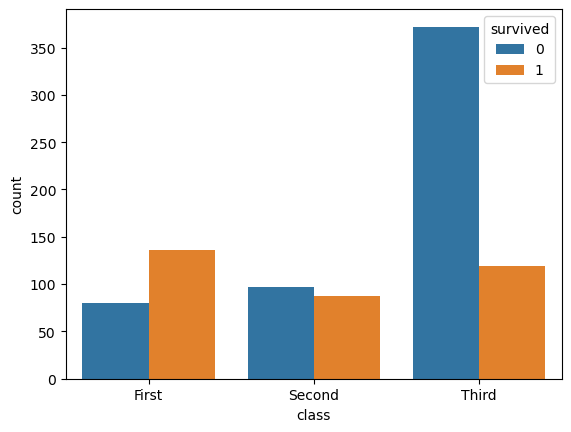

In [38]:
sns.countplot(data=df, x='class', hue='survived')

Can we state that the class has a direct impact on the survival rate? Quickly looking at the previous plot we could be tempted to say yes, but there might be underlying differences between population in the different classes. For instance, there might be a larger proportion of woman than man in the first class. So let's break the data into the who variable.

In [47]:
man_filter = df.who == 'man'
woman_filter = df.who == 'woman'
child_filter = df.who == 'child'

[Text(0.5, 1.0, 'Children')]

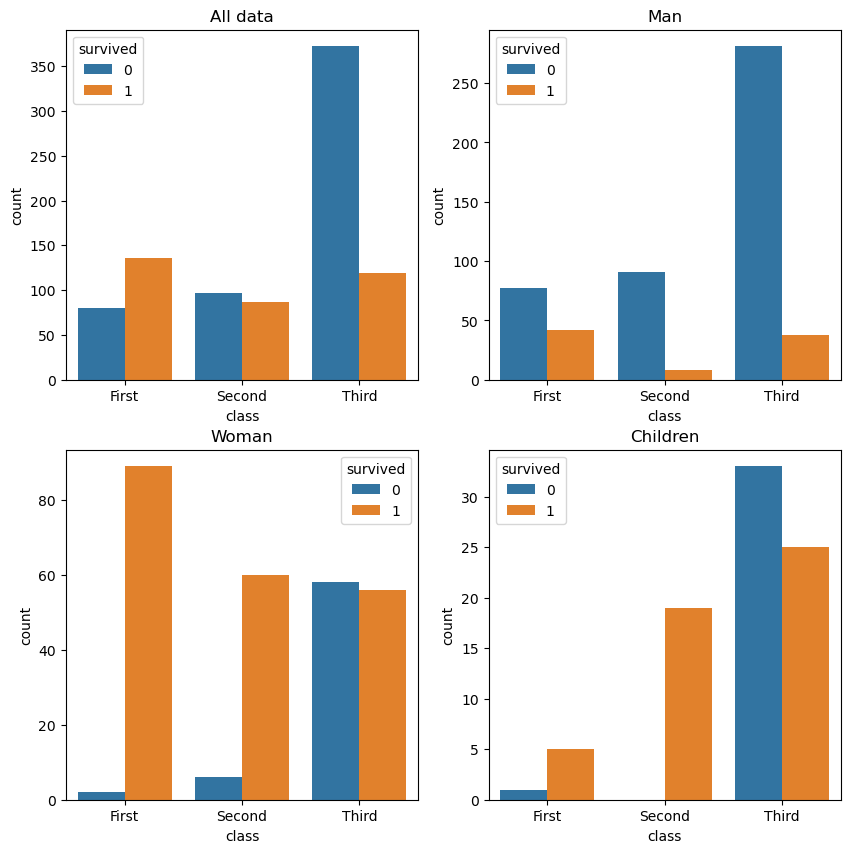

In [57]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(data=df, x='class', hue='survived', ax=ax[0,0]).set(title='All data')
sns.countplot(data=df[man_filter], x='class', hue='survived', ax=ax[0,1]).set(title='Man')
sns.countplot(data=df[woman_filter], x='class', hue='survived', ax=ax[1,0]).set(title='Woman')
sns.countplot(data=df[child_filter], x='class', hue='survived', ax=ax[1,1]).set(title='Children')

Interestingly, the survival rate is higher in third class than it is in second. And for children, the survival rate is higher in the second class than it is in the first. 

See https://cs.brown.edu/courses/cs100/students/project28/ for more details.

## Numerical variables: quantiles, mean, variance and distributions

Measures that indicate the approximate center of a distribution are called measures of central tendency or centrality measures. Measures that describe the spread of the data or its variability are measures of dispersion. These measures include the mean, median, mode, range, upper and lower quartiles, variance, and standard deviation.

In [133]:
#Describe the data - Descriptive statistics for numerical variables.

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The values given are:
* *count* gives the number of non-null entries.
* *mean* is the average of non-null entries (a centrality measure)
* *std* is the standard deviation (a dispersion measure)
* *min* and *max* give the minimum and maximum values, the range.
* *25%*, *50%* and *75%* give the different quantiles. Quantiles are based on data ordering.

Note that the 50% quantile is also called the **median**. If the data has no outliers, the mean and the median are generally close values. The fact that the mean and the median of the variable *fare* are so different is probably indicative of very high fares. 

### Quantiles

Quantiles can be used to obtain centrality and dispersion measures. The centrality measure is obtained by the 50% quantile while the dispersion is the inter-quantile range, the difference between the 75% and 25% quantiles. The larger the IQR, the more disperse the data is. 

In [136]:
data = [0,1,1,2,3,5,5,5,6,6,9,10,12,14,15,20,21,21,22,23]
# data = [0,1,1,2,3,5,5,5,6,6,9,10,12,14,15,20,41,41,42,43]
data = [0,1,1,2,3,5,5,5,6,6,9,10,12,14,15,20,41,41,52,63]

In [137]:
method = 'averaged_inverted_cdf'
q1 = np.quantile(data, 0.25, method=method)
q2 = np.quantile(data, 0.5, method=method)
q3 = np.quantile(data, 0.75, method=method)

Text(7.9, 6.2, 'IQR = Q3 - Q1 = 13.5')

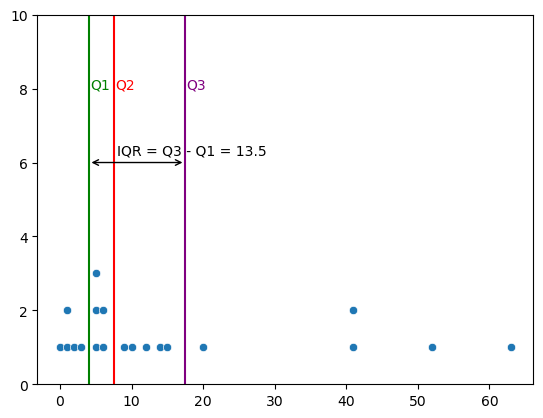

In [138]:
# Just specifying y coordinates so that data points don't overlap on the plot
y = [1,1,2,1,1,1,2,3,1,2,1,1,1,1,1,1,1,2,1,1]
ax = sns.scatterplot(x=data, y=y)
ax.set(ylim=(0, 10))

epsilon = 0.2
ax.axvline(q1, color='green')
ax.text(q1+epsilon, 8, 'Q1',color='green')

ax.axvline(q2, color='red')
ax.text(q2+epsilon, 8, 'Q2',color='red')

ax.axvline(q3, color='purple')
ax.text(q3+epsilon, 8, 'Q3',color='purple')

ax.annotate(text='', xy=(q1,6), xytext=(q3,6), arrowprops=dict(arrowstyle='<->'))
ax.text(q2+2*epsilon, 6.2, f'IQR = Q3 - Q1 = {q3-q1}')

### Mean and standard deviation

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):
$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n}. $$
The mean gets used in many statements, conclusions and it pitfalls are not always clear to people. The mean is a centrality measure that is **not robust to outliers**. We will talk more about outliers in a moment. But for now, just be aware that the mean without a standard deviation caries very little information.

As an example, the two following statements are true. 
* On average, number of child per US family was **2** in 2009.
* On average, US presidents have been charged with **2** felonies.

But the variances of the two underlying distributions are drastically different as a single president (out of 45) was charged with all 91 folonies.

In [139]:
m = np.mean(data)
std = np.std(data)

Text(7.775, 6.2, 'Mean +/- Standard deviation')

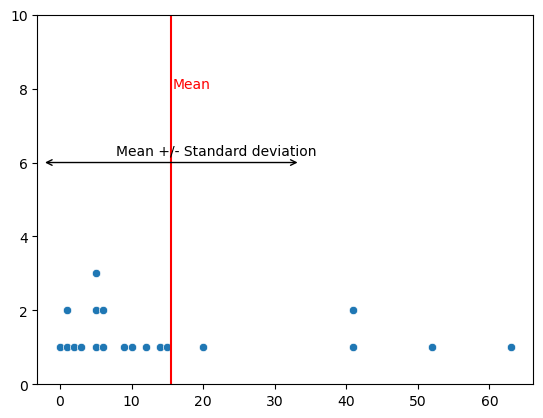

In [140]:
# Just specifying y coordinates so that data points don't overlap on the plot
y = [1,1,2,1,1,1,2,3,1,2,1,1,1,1,1,1,1,2,1,1]
ax = sns.scatterplot(x=data, y=y)
ax.set(ylim=(0, 10))

epsilon = 0.2

ax.axvline(m, color='red')
ax.text(m+epsilon, 8, 'Mean',color='red')

ax.annotate(text='', xy=(m-std,6), xytext=(m+std,6), arrowprops=dict(arrowstyle='<->'))
ax.text(m/2, 6.2, f'Mean +/- Standard deviation')

### Distributions

Let's look at the distributions and compute means and medians of some variables of our data. Note that instead of using np.mean and np.median to compute means and variance we use np.nanmean and np.nanmedian. This is because we want the NaN value to be ignored.

In the case of the variable *age*, the mean and median are very close. The mean is a little larger as some values are larger: right tail in the distribution.

[Text(0.5, 1.0, 'Age distribution')]

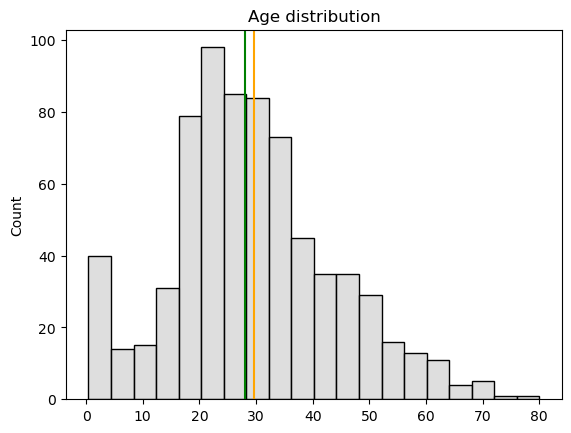

In [217]:
x = np.array(df.age)
ax = sns.histplot(x, color = 'lightgray')
ax.axvline(x = np.nanmean(x), color='orange')
ax.axvline(x = np.nanmedian(x), color='green')
ax.set(title='Age distribution')

In the case of *fare*, the mean and the median are completely different: this is due to the presence of a small number of very expensive fares. As half of the people did pay less than \\$14.45 (median), some did pay over \\$500. As a result, the average fare is \\$32.20 (mean) but 680 travellers out of 891 paied less than this amount. The interpretation of the mean is very dependent on the distribution and the presence of outliers.

[Text(0.5, 1.0, 'Fare distribution')]

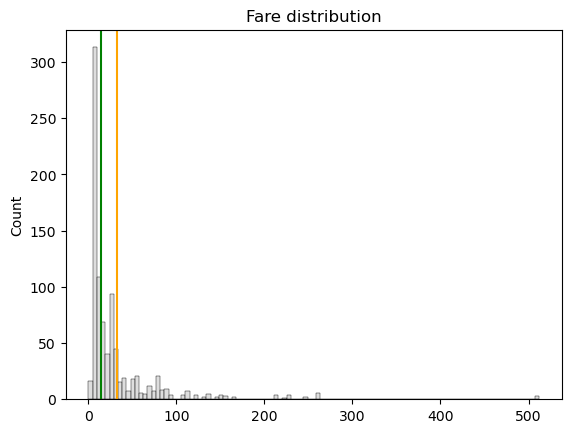

In [218]:
x = np.array(df.fare)
ax = sns.histplot(x, color = 'lightgray')
ax.axvline(x = np.nanmean(x), color='orange')
ax.axvline(x = np.nanmedian(x), color='green')
ax.set(title = 'Fare distribution')

In [147]:
sum(x<np.nanmean(x))

680

### Histogram robustness and density plot

One of the hidden parameter of the histogram is the number of bins to group data into. By default, this value is computed automatically. However, it is interesting to see how the number of bins can drastically change our understanding of the data. For the variable *age* for instance, if the number of bins is small (3), we see a nearly flat distribution between ages of 0 and 55. In the case of 50 bins, the resolution is high and we see more *modes* appearing (3 high peaks).

[Text(0.5, 1.0, 'Number of bins:')]

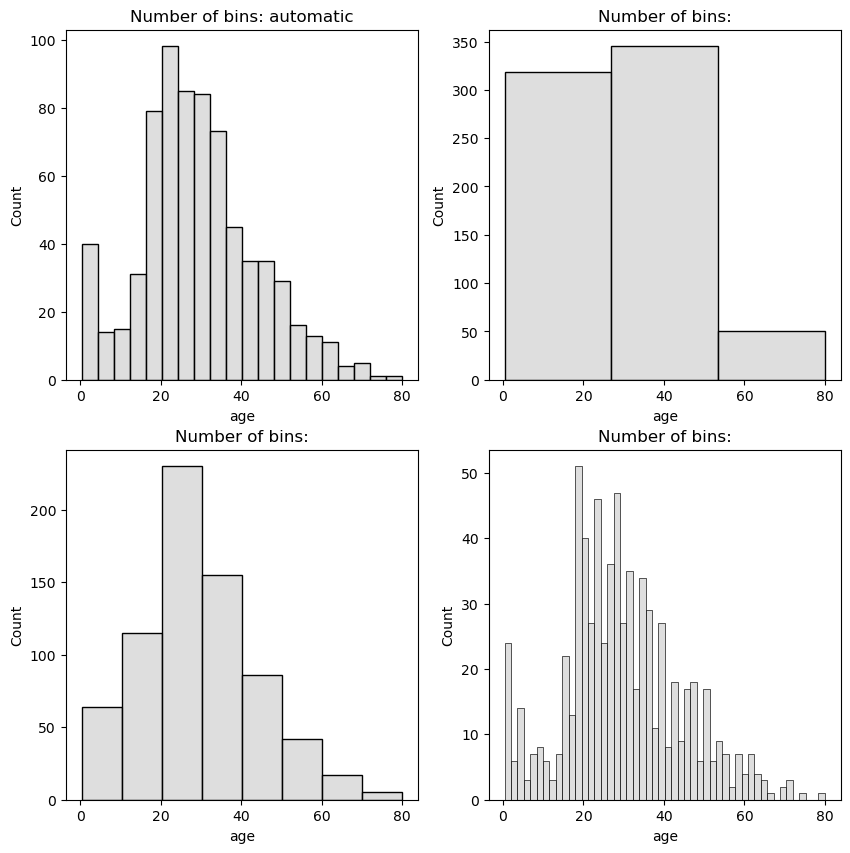

In [204]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.histplot(df, x='age', color = 'lightgray', ax=ax[0,0]).set(title='Number of bins: automatic')
sns.histplot(df, x='age', color = 'lightgray', bins=3, ax=ax[0,1]).set(title='Number of bins:')
sns.histplot(df, x='age', color = 'lightgray', bins=8, ax=ax[1,0]).set(title='Number of bins:')
sns.histplot(df, x='age', color = 'lightgray', bins=50, ax=ax[1,1]).set(title='Number of bins:')

#### Density plot

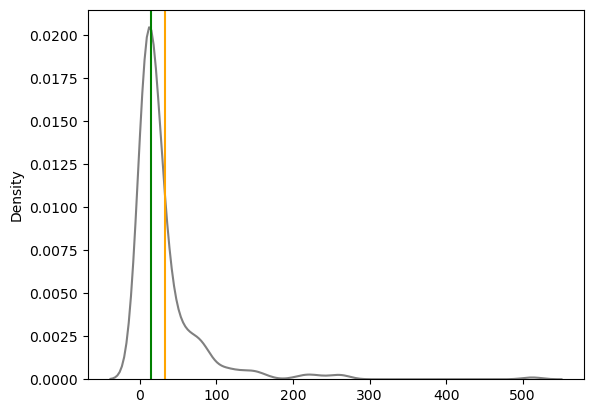

In [219]:
x = np.array(df.fare)
ax = sns.kdeplot(x, color = 'gray', )
ax.axvline(x = np.nanmean(x), color='orange')
ax.axvline(x = np.nanmedian(x), color='green')

# Outliers and robustness

An outlier is an observation that lies at an abnormal distance from other values. In a sense, this definition leaves it up to the analyst to decide what will be considered abnormal. Outlier data does not necessarily mean *erroneous data*. However, it sometimes can help identify data quality issues.
Consider the following four quantities: 

* lower inner fence: Q1 - 1.5*IQ
* upper inner fence: Q3 + 1.5*IQ
* lower outer fence: Q1 - 3*IQ
* upper outer fence: Q3 + 3*IQ 

Outlier detection criteria 
* points beyond an inner fence on either side is considered a **mild outliers**. 
* points beyond an outer fence is considered an **extreme outliers**. 

Let's introduce a real data entry problem: replace the age of 22 by the age of 2222 (probably a keyboard issue!) 

As we can see, this error affects some of the descriptive statistics we had studied before. Hence, it allows to see which statistics are more robust to outliers than others.

In [220]:
df_modified = df[['age']].copy()
df_modified['noisy_age'] = df_modified['age']
df_modified.loc[0, 'noisy_age'] = 2222
df_modified.describe()

,age,noisy_age
count,714.000000,714.000000
mean,29.699118,32.780350
std,14.526497,83.319977
min,0.420000,0.420000
25%,20.125000,20.125000
50%,28.000000,28.000000
75%,38.000000,38.000000
max,80.000000,2222.000000


As we can see, an important outlier can change the mean and the standard deviation of the variable. The mean of the age went from 29.6 to 65. However, the quartiles are unchanged. Quartiles are more robust to such problems with the data.

| Sensitive to outliers    | Robust to outliers |
| -------- | ------- |
|  -  | Count (number of entries)    |
| Mean |  Median (quantile 50%)     |
| Minimum    |  Low quantile (5%)  |
| Maximum    |  High quantile (95%)   |
| Range  |  Range from quantiles   |
| -  |  Mode   |

In [221]:
x_noisy = np.array(df_modified['noisy_age'])
q1 = np.nanpercentile(x_noisy, 25)
q3 = np.nanpercentile(x_noisy, 75)
iqr = q3 - q1

mild_threshold = 1.5 * iqr
outliers = (x_noisy < q1 - mild_threshold) | (x_noisy > q3 + mild_threshold)
 
print("Mild outliers of x_noisy is : \n", x_noisy[outliers])

extreme_threshold = 3 * iqr
outliers = (x_noisy < q1 - extreme_threshold) | (x_noisy > q3 + extreme_threshold)
 
print("Extreme outliers of x_noisy is : \n", x_noisy[outliers])

Mild outliers of x_noisy is : 
 [2222.    66.    65.    71.    70.5   65.    65.    71.    80.    70.
   70.    74. ]
Extreme outliers of x_noisy is : 
 [2222.]


# Redundant variables? Dependance and correlations

It is very important to understand what information each variable brings to the problem. If two variables are highly correlated or if one can be deduced from the other, than if has to be known and possibly removed from the variable set before feeding the data into any machine learning model. 

Another reason for identifying dependencies is missing value treatment: Consider two categorical variables X1 and X2 and they are trying to predict Y. X1 and X2 are highly correlated and so we have to pick one of them. Variable X1 is making more business sense but data is populated only for 90% of the records. So missing values of X1 can be easily imputed using X2 as they are correlated.

Third reason is to understand the business better. Understanding relationship between variables is not much explored, but importance once understood can do wonders to the business. Performing deep dive analysis to identify hidden trends and relationships between various dimensions is something that can really help make decisions. Sometimes it can also help in validating the data which can further help in improving data quality.

### Categorical : Bivariate counts or Cramer V test

In the Titanic example, the variables *embarked* and *embark_town* are dependant. Actually, they are identical. Clearly, one of the two can be dropped.

In [222]:
pd.crosstab(df['embarked'], df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


The same can be said about *sex*, *who* and *adult_male* which are clearly dependant. These three variables could be replaced by two independent ones: *sex* and a boolean variable *is_child* for instance.

In [223]:
df.groupby(['sex', 'who', 'adult_male'], dropna=False).size().reset_index(name='RowCount')

,sex,who,adult_male,RowCount
0,female,child,False,43
1,female,woman,False,271
2,male,child,False,40
3,male,man,True,537


In [162]:
import association_metrics as am

df_cat = df.apply(
        lambda x: x.astype("category") if (x.dtype == "O" or x.dtype == bool) else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df_cat) 

#df_cat.info()

In [163]:
cramersv.fit()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,1.000000,0.122569,0.138013,0.947675,0.908578,0.293260,0.122569,0.543351,0.303646
embarked,0.122569,1.000000,0.263821,0.092303,0.111508,0.226588,1.000000,0.172617,0.119957
class,0.138013,0.263821,1.000000,0.144761,0.106778,0.646118,0.263821,0.339817,0.135914
who,0.947675,0.092303,0.144761,1.000000,1.000000,0.321355,0.092303,0.564497,0.453343
adult_male,0.908578,0.111508,0.106778,1.000000,1.000000,0.269952,0.111508,0.557080,0.404744
deck,0.293260,0.226588,0.646118,0.321355,0.269952,1.000000,0.226588,0.202596,0.260397
embark_town,0.122569,1.000000,0.263821,0.092303,0.111508,0.226588,1.000000,0.172617,0.119957
alive,0.543351,0.172617,0.339817,0.564497,0.557080,0.202596,0.172617,1.000000,0.203367
alone,0.303646,0.119957,0.135914,0.453343,0.404744,0.260397,0.119957,0.203367,1.000000


<Axes: >

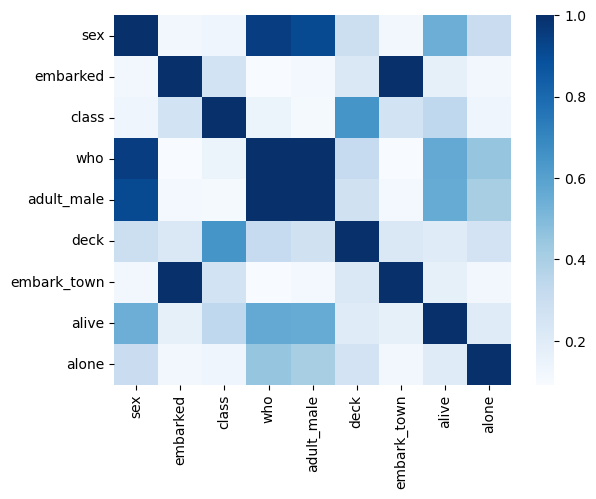

In [164]:
sns.heatmap(cramersv.fit(), cmap="Blues")

### Numerical : pairwise correlations, scatter plots and other plots

We can also look at correlations between numerical variables: *linear correlations*. Note that large positive values or large negative values both indicate correlations. We can use the heatmap function on the absolute values of correlations to quickly grasp which variables are linked. 

$$ r_{xy} = \frac{1}{n-1} \sum_i \big( \frac{x_i - \bar{x}}{s_x} \big) \big( \frac{y_i - \bar{y}}{s_y} \big) $$

with $ s_x = \sqrt{\frac{1}{n-1}\sum_i (x_i - \bar{x})^2}.$

In [122]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

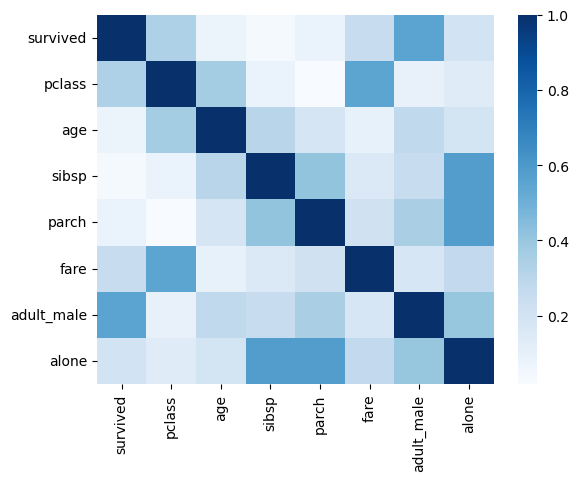

In [125]:
sns.heatmap(abs(df.corr(numeric_only=True)), cmap="Blues")

We see in the plot that *fare* and *pclass* are correlated, and so are *alone*, *sibsp* and *parch*. The variables *survived* and *adult_male* are also correlated.

We can also use a scatter plot to visualize how two variables jointly behave.

<Axes: xlabel='pclass', ylabel='fare'>

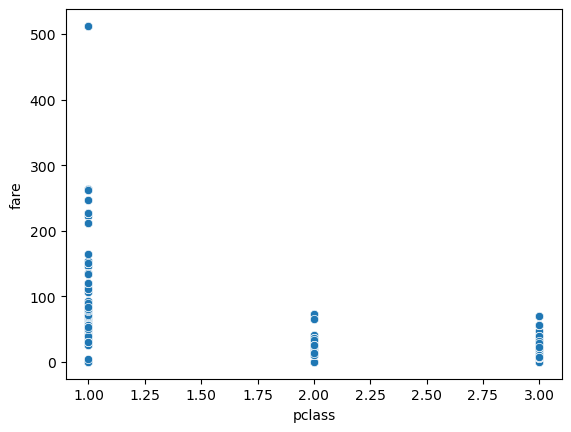

In [172]:
sns.scatterplot(df, x='pclass', y='fare')

Since the variable *pclass* on the x-axis is discrete and has a small number of values, other plots are more appropriate. For instance, we can use the **boxplots** or the **violinplots** in this case on the variable *fare* that we break down using *pclass*.

* Boxplots show the quartiles of the distribution (Q1 and Q3 form the box boundaries, Q2 in the middle) and the two lines (whiskers) identify outliers.
* Violinplots show density estimations of the variable.

<Axes: xlabel='pclass', ylabel='fare'>

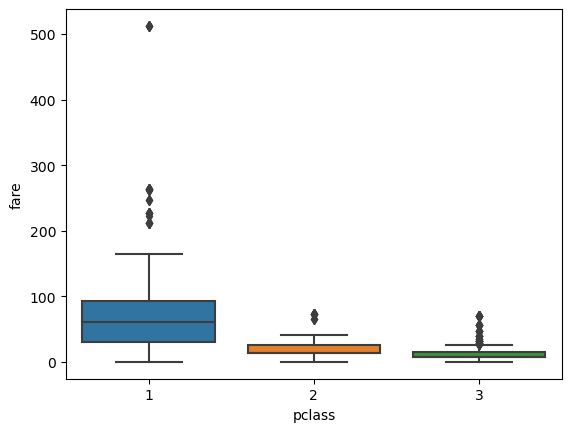

In [179]:
sns.boxplot(df, x='pclass', y='fare')

<Axes: xlabel='pclass', ylabel='fare'>

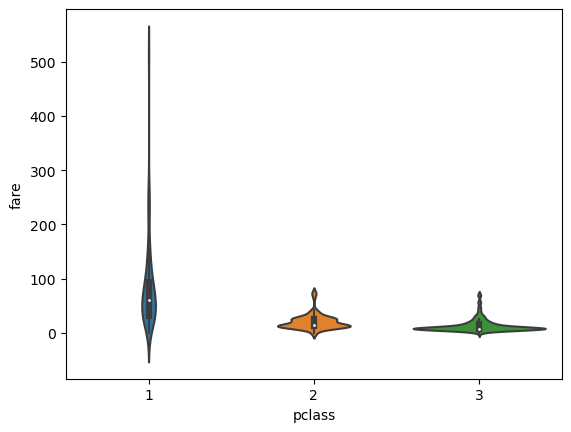

In [180]:
sns.violinplot(df, x='pclass', y='fare')

# Replace the Null values ?

Oh no, we have some null values in the ‘Age’ and ‘Cabin’ variables. Hey, we got a replace() function to replace all the null values with a specific data. 

* Imputation? out of scope.

In [ ]:
# Replacing null values
df_modified.replace(np.nan, 0 ,inplace = True)
df_modified.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

Replacing null values can be done in different ways, and it very depends on external knowledge about the variable's meaning. One very common thing to do, is to replace the null values by the **mode** of the variable, that is the most common value.

# Statistical Pitfalls

## Measures pitfalls

**Use of basic summary numbers** <br>  

Using basic summary numbers, such as *averages*, can sometimes be misleading.

Example: <br>
If houses in Hobart were advertised for sale at \\$275,000, \\$295,000, \\$300,000, \\$325,000 and \\$850,000 respectively, using the mean to calculate the average house price would produce a figure of \\$409,000. This gives an over-inflated impression of house values in Hobart. In reality, the median value of \\$300,000 would give a much more accurate picture of average house prices.

**Use of proportions** <br>  

Using proportions can also produce misleading conclusions, especially if the numbers involved are small.

Example: <br>
According to reliable crime and justice statistics, from 2005-06 to 2006-07, there was a 50% increase in the number of murders in Tasmania. While this is true, the actual numbers of murders increased from 4 to 6, not nearly as dramatic an increase as the percentage increase would have us believe.


**Seasonal variations** <br>  

Seasonal variations can influence results.

Example: <br>
Retail sales for March one year may be down the following year. At face value, it may be reasonable to conclude that business returns had suffered. However, it may simply be the effects of Easter shifting from March in the earlier year to April in the later year. To remove the effects of this type of seasonal variation, the ABS uses seasonal adjustment to standardise the data.


## Comparison pitfalls

Be wary when making comparisons. Comparisons cannot be made between 'apples and oranges', only between 'oranges and oranges'. Care must be taken when:

**Comparing data from different sources** <br> 

You need to consider whether the data sets are actually comparable.

Example: <br>
    ABS and Centrelink both collect information about unemployed persons, but the data sets are not comparable. ABS unemployed are defined by activity. That is, they are people who are without work, but have been actively seeking work in the past four weeks, and were available to start work last week. Centrelink unemployed are defined by their eligibility to receive unemployment benefits.


**Changes have occurred** <br> 

Changes can occur to a data set over time, such as changes in classification, geography, sample size, methodology, etc.

Example: <br>
    New industry classification codes, known as Australian and New Zealand Standard Industrial Classification (ANZSIC), were developed in 2006, replacing the 1993 edition, which was the first version produced. ANZSIC 2006 codes reflect the changes that have occurred in the structure and composition of industry since the previous edition, and enhance international comparability. However, direct comparisons with ANZSIC 1993 cannot be made.


**Definitions differ** <br> 

Definitions may differ depending on the context or the survey. Always check that you have the correct definition and are clear about what you are describing. Make sure you are aware of the data boundaries.

Example: <br>
The term 'child' can mean many different things. Depending on the context, a child could be someone:
* aged under 13 years
* aged under 15 years
* aged under 18 years

Be wary of making comparisons with other data sources - be sure to check that you are comparing apples with apples.

## Correlation vs. Causation

Correlation does not mean causation. The relationship between data and an event may be purely coincidental, or there may be multiple reasons behind an event taking place, with the data only reflecting one aspect of the relationship.

Example: <br>
    The increased number of shark attacks along the eastern seaboard of Australia in January 2009 may have corresponded with booming retail sales of sunscreen products. This retail boom just happened to coincide with the peak shark attack period, but the number of attacks is unlikely to be related to the increased use of sunscreen.
